# Figure Two & Four: Timeseries & Longitude Plot

- Panel One: PSP & SolO Proton Radial Velocity 
- Panel Two: PSP & SolO Scaled Proton Density
- Panel Three: PSP & SolO Scaled Radial Magnetic Field, Radial Position
- Panel Four: PSP & SolO Cross Helicity
- Panel Five: PSP Mach Number & SolO Normalized Fe/O ratio

## Imports

In [1]:
import sys, os
import astropy.units as u

import datetime
import numpy as np
import pandas as pd
import scipy.constants as con
from scipy import stats
import scipy.stats as stats
from scipy.interpolate import interp1d
from pandas.tseries.frequencies import to_offset

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator


import sunpy
import astrospice
from astropy.time import Time
from pyspedas import time_string

import tools.utilities as utils
import tools.psp_funcs as psp_funcs
import tools.pfss_funcs as pfss_funcs


for sc in ['psp','solar orbiter'] : kernels = astrospice.registry.get_kernels(sc,'predict') 

# COLORS
c = ['#ae017e','#085A99',  '#c98000'] # darker colors
lightc = ['#FCA4C4',  '#8FD3F4', '#FFCC70'] # lighter colors
fcol = 'mistyrose'
sacol='lavender'
scol = 'violet'
hcol = 'lightblue'
pcol = 'lightgreen'
aa = 0.6
lw=2
clon = c[0]
clat = c[1]
rcol = 'dimgrey'
cmaps = ['RdPu', 'cool', 'Wistia', 'spring'] # velocity, density, magnetic field

# REGIONS
loc_hcs = [112, 115]
pseud = [166.5, 173]
fsw = [70, 85]
ssw = [150, 166.5]
sasw = [173, 185]

# DIRECTORIES
IMG_DIR = './figures'
DF_DIR = './results'
PlotDir = '/Users/tamarervin/mplstyle/'


# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 16})
plt.style.use(plot_style)

Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

02-Aug-23 12:38:31: /Users/tamarervin/miniconda3/envs/e11_conjunction/lib/python3.11/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "dtf2d" yielded 1 of "dubious year (Note 6)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),



Files Downloaded:   0%|          | 0/1 [00:00<?, ?file/s]

In [2]:
# regular data
parker = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parker.csv')
orbiter = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiter.csv')
abun = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abun.csv')
smag = pd.read_csv('/Users/tamarervin/e11_conjunction/results/solo_mag.csv')
merged_df = pd.read_csv('/Users/tamarervin/e11_conjunction/results/merged_df.csv')
pss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/pss.csv')
oss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/oss.csv')

# timesampled data
parkerdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parkerdownt.csv')
orbiterdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiterdownt.csv')
abundownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abundownt.csv')
smagdownt = pd.read_csv('/Users/tamarervin/e11_conjunction/results/smagdownt.csv')

# longitudinally sampled data
parkerdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/parkerdownl.csv')
orbiterdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/orbiterdownl.csv')
abundownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/abundownl.csv')
smagdownl = pd.read_csv('/Users/tamarervin/e11_conjunction/results/smagdownl.csv')

# PFSS/MHD data
tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/mhd_footpoints.dat', sep='\s+') 
so_tracerdf = pd.read_csv('/Users/tamarervin/e11_conjunction/mhd/so_mhd_footpoints.dat', sep='\s+')
pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/psp_pfss.csv')
so_pfss = pd.read_csv('/Users/tamarervin/e11_conjunction/results/so_pfss.csv')

# FIX TIMESTAMPS
parker['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parker.Time]
orbiter['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in orbiter.Time]
pss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in pss.Time]
oss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in oss.Time]
smag['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in smag.Time]
abun['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S.%f') for d in abun.Time]
so_pfss['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in so_pfss.times]
parkerdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in parkerdownt.Time]
orbiterdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in orbiterdownt.Time]
smagdownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in smagdownt.Time]
abundownt['Time'] = [datetime.datetime.strptime(d, '%Y-%m-%d %H:%M:%S') for d in abundownt.Time]


## Figure Two: Timeseries

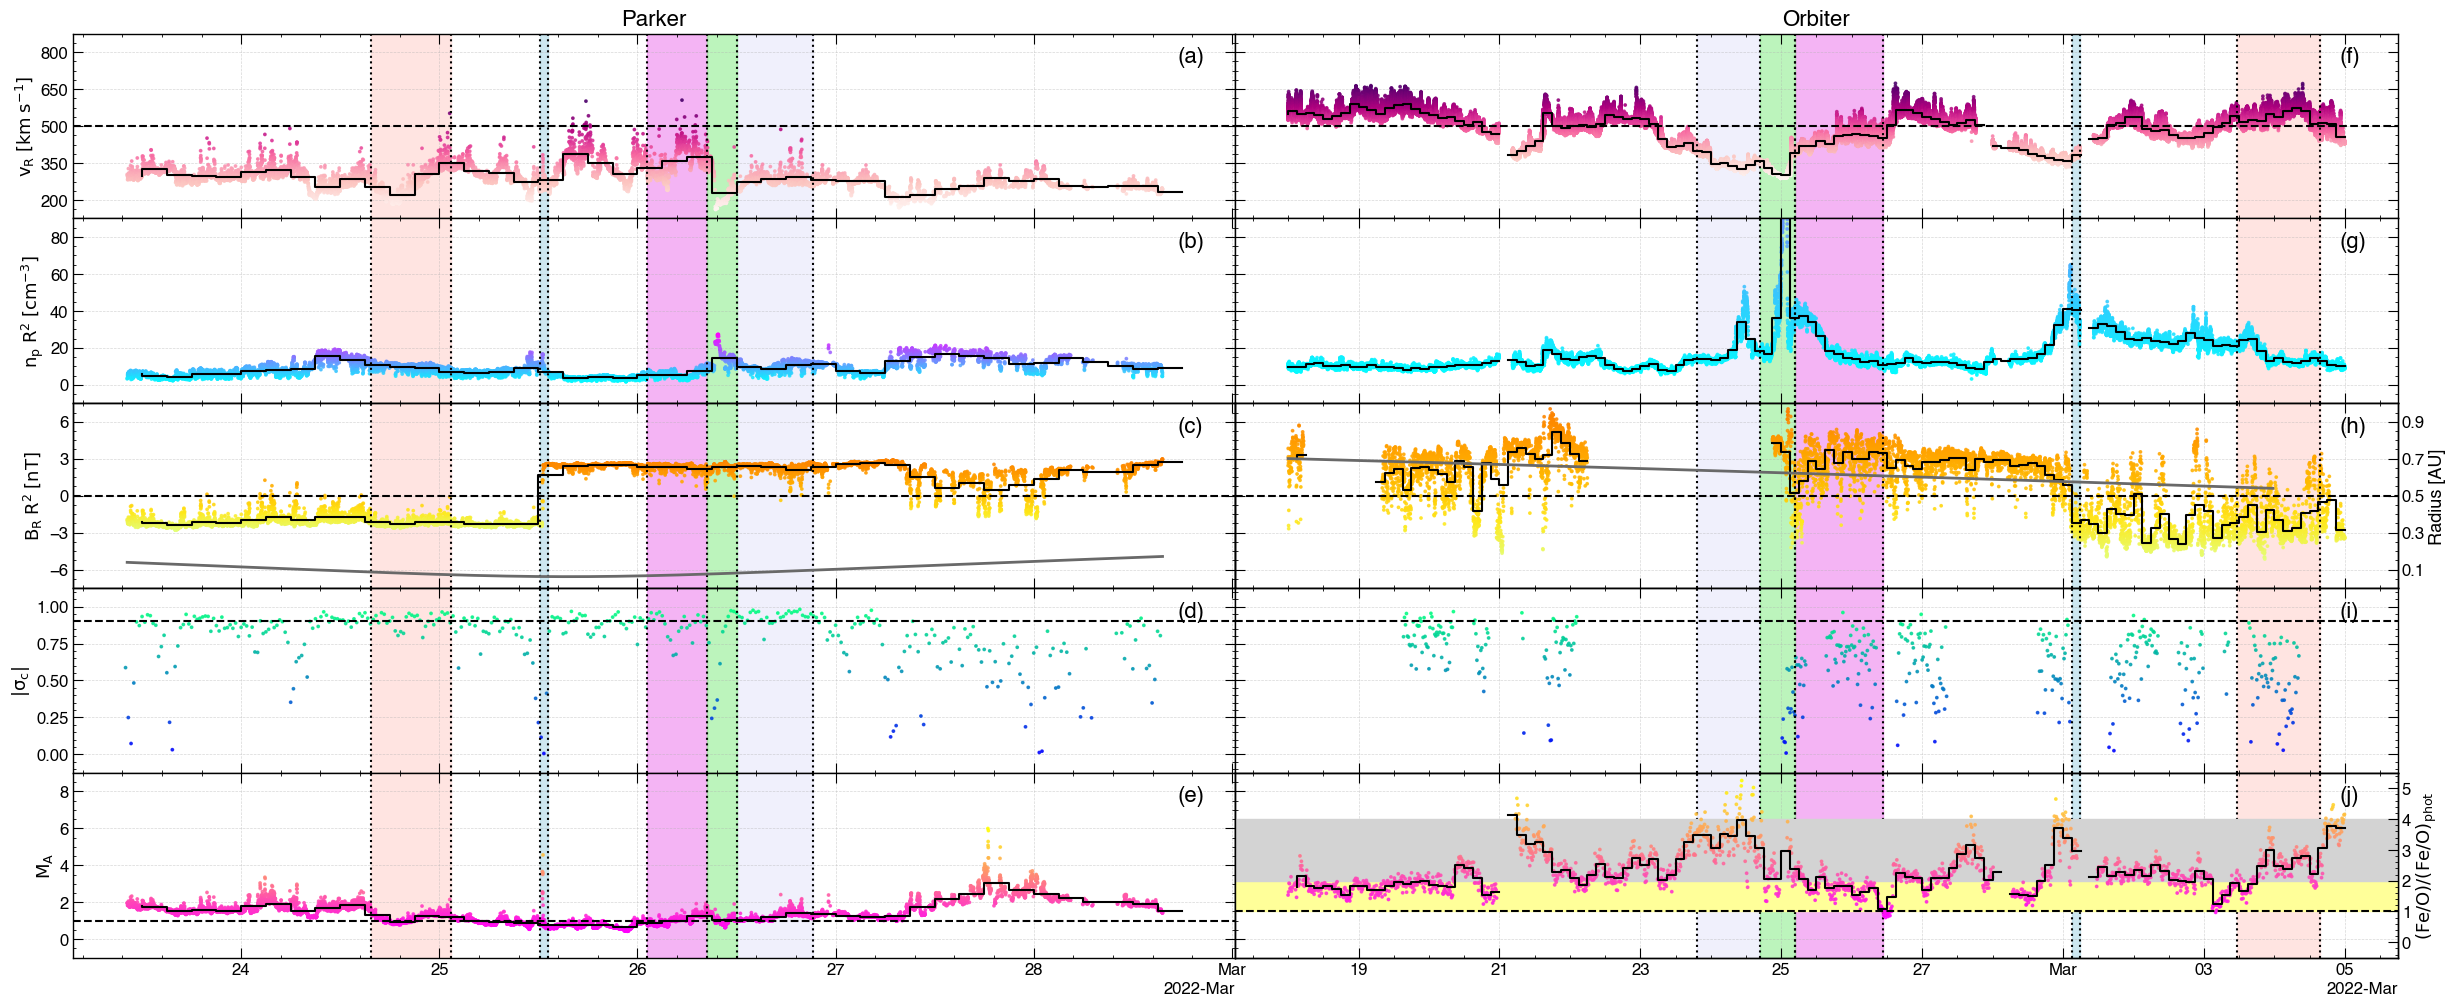

In [3]:
# PLOT SETUP
fig, axs = plt.subplots(5, 2, figsize=[30, 12], gridspec_kw={'hspace': 0, 'wspace': 0}, sharey='row')
xlabel = r'$\rm Time$'
ylabels = [r'$\rm v_R \; [km \; s^{-1}]$', 
r'$\rm n_p \; R^2 \; [cm^{-3}]$', 
r'$\rm B_R \; R^2 \;  [nT]$', 
r'$\rm |\sigma_c|$', 
r'$\rm M_A$',
r'$\rm (Fe/O)/(Fe/O)_{phot}$']
cmaps = ['RdPu', 'cool', 'Wistia', 'winter', 'spring']

# REGIONS
loc_hcs = [112, 115]
pseud = [166.5, 173]
fsw = [70, 85]
ssw = [150, 166.5]
sasw = [173, 185]

##### ---------- PARKER DATA  ---------- ######
### parker raw data ###
i=0
axs[0][0].scatter(parker.Time, parker.pvel, c=parker.pvel, cmap=cmaps[0], s=3, alpha=0.8, zorder=2)
axs[1][0].scatter(parker.Time, parker.pdens, c=parker.pdens, cmap=cmaps[1], s=3, alpha=0.8, zorder=2)
axs[2][0].scatter(parker.Time, parker.mag, c=parker.mag, cmap=cmaps[2], s=3, alpha=0.8, zorder=2)
axs[3][0].scatter(pss.Time, np.abs(pss.sigmac), c=np.abs(pss.sigmac), cmap=cmaps[3], s=3, alpha=0.8, zorder=2)
axs[4][0].scatter(parker.Time, parker.MA, c=parker.MA, cmap=cmaps[4], s=3, alpha=0.8, zorder=2)

### parker time step data ###
axs[0][0].step(parkerdownt.Time+datetime.timedelta(hours=3), parkerdownt.pvel, c='k', zorder=3)
axs[1][0].step(parkerdownt.Time+datetime.timedelta(hours=3), parkerdownt.pdens, c='k', zorder=3)
axs[2][0].step(parkerdownt.Time+datetime.timedelta(hours=3), parkerdownt.mag, c='k', zorder=3)
axs[4][0].step(parkerdownt.Time+datetime.timedelta(hours=3), parkerdownt.MA, c='k', zorder=3)

### radius (on B data) ###
axrad = axs[2][i].twinx() 
axrad.plot(parker.Time, parker.radius, c=rcol, linewidth=2, zorder=1)

### AXES AND TICK MARKS ###
axs[0][i].set(ylabel=ylabels[0], ylim=(125, 875), yticks=np.arange(200, 801, step=150))
axs[1][i].set(ylabel=ylabels[1], ylim=(-10, 90), yticks=np.arange(0, 81, step=20))
axs[2][i].set(ylabel=ylabels[2], ylim=(-7.5, 7.5), yticks=np.arange(-6, 6.1, step=3))
axs[3][i].set(ylabel=ylabels[3], ylim=(-0.125, 1.125), yticks=np.arange(0, 1.1, step=0.25))
axs[4][i].set(ylabel=ylabels[4], ylim=(-1, 9), yticks=np.arange(0, 8.1, step=2))
axrad.set(ylim=(0, 1), yticks=np.arange(0.1, 0.91, step=0.2), yticklabels=([]))

### PLOT MARKINGS ###
axs[0][i].axhline(500, color='k', linestyle='dashed')
axs[2][i].axhline(0, color='k', linestyle='dashed')
axs[3][i].axhline(0.9, color='k', linestyle='dashed')
axs[4][i].axhline(1, color='k', linestyle='dashed')
panel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)']
# shade regions
lon_footpoints = parker.lon
fsw = np.logical_and(lon_footpoints >= fsw[0], lon_footpoints <=fsw[1])
ssw = np.logical_and(lon_footpoints >= ssw[0], lon_footpoints <=ssw[1])
sasw = np.logical_and(lon_footpoints >= sasw[0], lon_footpoints <=sasw[1])
loc_hcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
pseud = np.logical_and(lon_footpoints >=pseud[0], lon_footpoints <=pseud[1])
for j in np.arange(0, 5, step=1):
    # add grid
    axs[j][i].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    # plot dashed lines
    axs[j][i].axvline(parker[loc_hcs].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(parker[loc_hcs].Time.iloc[-1], color='k', linestyle='dotted', zorder=5) 
    axs[j][i].axvline(parker[pseud].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(parker[pseud].Time.iloc[-1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(parker[fsw].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(parker[fsw].Time.iloc[-1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(parker[sasw].Time.iloc[-1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(parker[ssw].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    # shade regions
    axs[j][i].axvspan(parker[fsw].Time.iloc[0], parker[fsw].Time.iloc[-1], alpha=1, color=fcol, zorder=-3)
    axs[j][i].axvspan(parker[ssw].Time.iloc[0], parker[ssw].Time.iloc[-1], alpha=aa, color=scol, zorder=-3)
    axs[j][i].axvspan(parker[sasw].Time.iloc[0], parker[sasw].Time.iloc[-1], alpha=aa, color=sacol, zorder=-3)
    axs[j][i].axvspan(parker[loc_hcs].Time.iloc[0], parker[loc_hcs].Time.iloc[-1], alpha=aa, color=hcol, zorder=-3)
    axs[j][i].axvspan(parker[pseud].Time.iloc[0], parker[pseud].Time.iloc[-1], alpha=aa, color=pcol, zorder=-3)
    axs[j][i].text(0.95, 0.93, panel_labels[j], transform=axs[j][i].transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    axs[j][i].sharex(axs[0][0])

##### ---------- ORBITER DATA  ---------- ######
# REGIONS
loc_hcs = [112, 115]
pseud = [166.5, 173]
fsw = [70, 85]
ssw = [150, 166.5]
sasw = [173, 185]
i = 1
im0 = axs[0][i].scatter(orbiter.Time, orbiter.vr, c=orbiter.vr, cmap=cmaps[0], s=3, alpha=0.8, zorder=2)
im1 = axs[1][i].scatter(orbiter.Time[0::10], orbiter.use_dens[0::10], c=orbiter.use_dens[0::10], cmap=cmaps[1], s=3, alpha=0.8, zorder=2)
im2 = axs[2][i].scatter(smag.Time, smag.BrR2, c=smag.BrR2, cmap=cmaps[2], s=3, alpha=0.8, zorder=2)
axs[3][i].scatter(oss.Time, np.abs(oss.sigmac), c=np.abs(oss.sigmac), cmap=cmaps[3], s=3, alpha=0.8, zorder=2)
axright = axs[4][i].twinx()
im3 = axright.scatter(abun.Time, abun.iron/0.0589, c=abun.iron/0.0589, cmap=cmaps[4], s=3, alpha=0.8, zorder=2)
panel_labels = [ '(f)', '(g)', '(h)', '(i)', '(j)']
### plot orbiter time step data ###
axs[0][i].step(orbiterdownt.Time+datetime.timedelta(hours=3), orbiterdownt.vr, c='k', zorder=3)
axs[1][i].step(orbiterdownt.Time+datetime.timedelta(hours=3), orbiterdownt.use_dens, c='k', zorder=3)
axs[2][i].step(smagdownt.Time+datetime.timedelta(hours=3), smagdownt.BrR2, c='k', zorder=3)
axright.step(abundownt.Time+datetime.timedelta(hours=3), abundownt.iron/0.0589, c='k', zorder=3)

### plot orbiter radius
axrad  = axs[2][i].twinx() 
axrad.plot(so_pfss.Time, so_pfss.rAU, c=rcol, linewidth=2, zorder=1)

### add axes labels and tick marks
axs[0][i].set(ylim=(125, 875), yticks=np.arange(200, 801, step=150))
axs[1][i].set(ylim=(-10, 90), yticks=np.arange(0, 81, step=20))
axs[2][i].set(xlabel=xlabel, ylim=(-7.5, 7.5), yticks=np.arange(-6, 6.1, step=3))
axrad.set(ylabel='Radius [AU]', ylim=(0, 1), yticks=np.arange(0.1, 0.91, step=0.2))

axright.set(xlabel=xlabel, ylabel=ylabels[-1], ylim=(-0.5, 5.5), yticks=np.arange(0, 5.1, step=1))
axs[0][i].axhline(500, color='k', linestyle='dashed')
axs[2][i].axhline(0, color='k', linestyle='dashed')
axs[3][i].axhline(0.9, color='k', linestyle='dashed')
axright.axhline(1, color='k', linestyle='dashed')
axright.axhspan(1, 2, alpha=1, color='#FFFF99', zorder=-4)
axright.axhspan(2, 4, alpha=1, color='#D3D3D3', zorder=-4)

### SHADE REGIONS ###
# solar orbiter
lon_footpoints = orbiter.lon
fsw = np.logical_and(lon_footpoints >= fsw[0], lon_footpoints <=fsw[1])
ssw = np.logical_and(lon_footpoints >= ssw[0], lon_footpoints <=ssw[1])
sasw = np.logical_and(lon_footpoints >= sasw[0], lon_footpoints <=sasw[1])
loc_hcs = np.logical_and(lon_footpoints >= loc_hcs[0], lon_footpoints <=loc_hcs[1])
pseud = np.logical_and(lon_footpoints >=pseud[0], lon_footpoints <=pseud[1])
# apply shading
for j in np.arange(0, 5, step=1):
    # add grid
    axs[j][i].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    # plot vertical lines 
    axs[j][i].axvline(orbiter[loc_hcs].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(orbiter[loc_hcs].Time.iloc[-1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(orbiter[pseud].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(orbiter[pseud].Time.iloc[-1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(orbiter[fsw].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(orbiter[fsw].Time.iloc[-1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(orbiter[sasw].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(orbiter[ssw].Time.iloc[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(orbiter[ssw].Time.iloc[-1], color='k', linestyle='dotted', zorder=5)
    # shade regions
    axs[j][i].axvspan(orbiter[fsw].Time.iloc[0], orbiter[fsw].Time.iloc[-1], alpha=1, color=fcol, zorder=-3)
    axs[j][i].axvspan(orbiter[ssw].Time.iloc[0], orbiter[ssw].Time.iloc[-1], alpha=aa, color=scol, zorder=-3)
    axs[j][i].axvspan(orbiter[sasw].Time.iloc[0], orbiter[sasw].Time.iloc[-1], alpha=aa, color=sacol, zorder=-3)
    axs[j][i].axvspan(orbiter[loc_hcs].Time.iloc[0], orbiter[loc_hcs].Time.iloc[-1], alpha=aa, color=hcol, zorder=-3)
    axs[j][i].axvspan(orbiter[pseud].Time.iloc[0], orbiter[pseud].Time.iloc[-1], alpha=aa, color=pcol, zorder=-3)
    axs[j][i].text(0.95, 0.93, panel_labels[j], transform=axs[j][i].transAxes, fontsize=16, fontweight='bold', va='top', ha='left')
    axs[j][i].sharex(axs[0][1])

### SET TITLES
axs[0][0].set_title('Parker')
axs[0][1].set_title('Orbiter')

### save figure
plt.savefig(os.path.realpath('figures/timeseries.png'), bbox_inches='tight')

## Figure Three: Longitude Plot

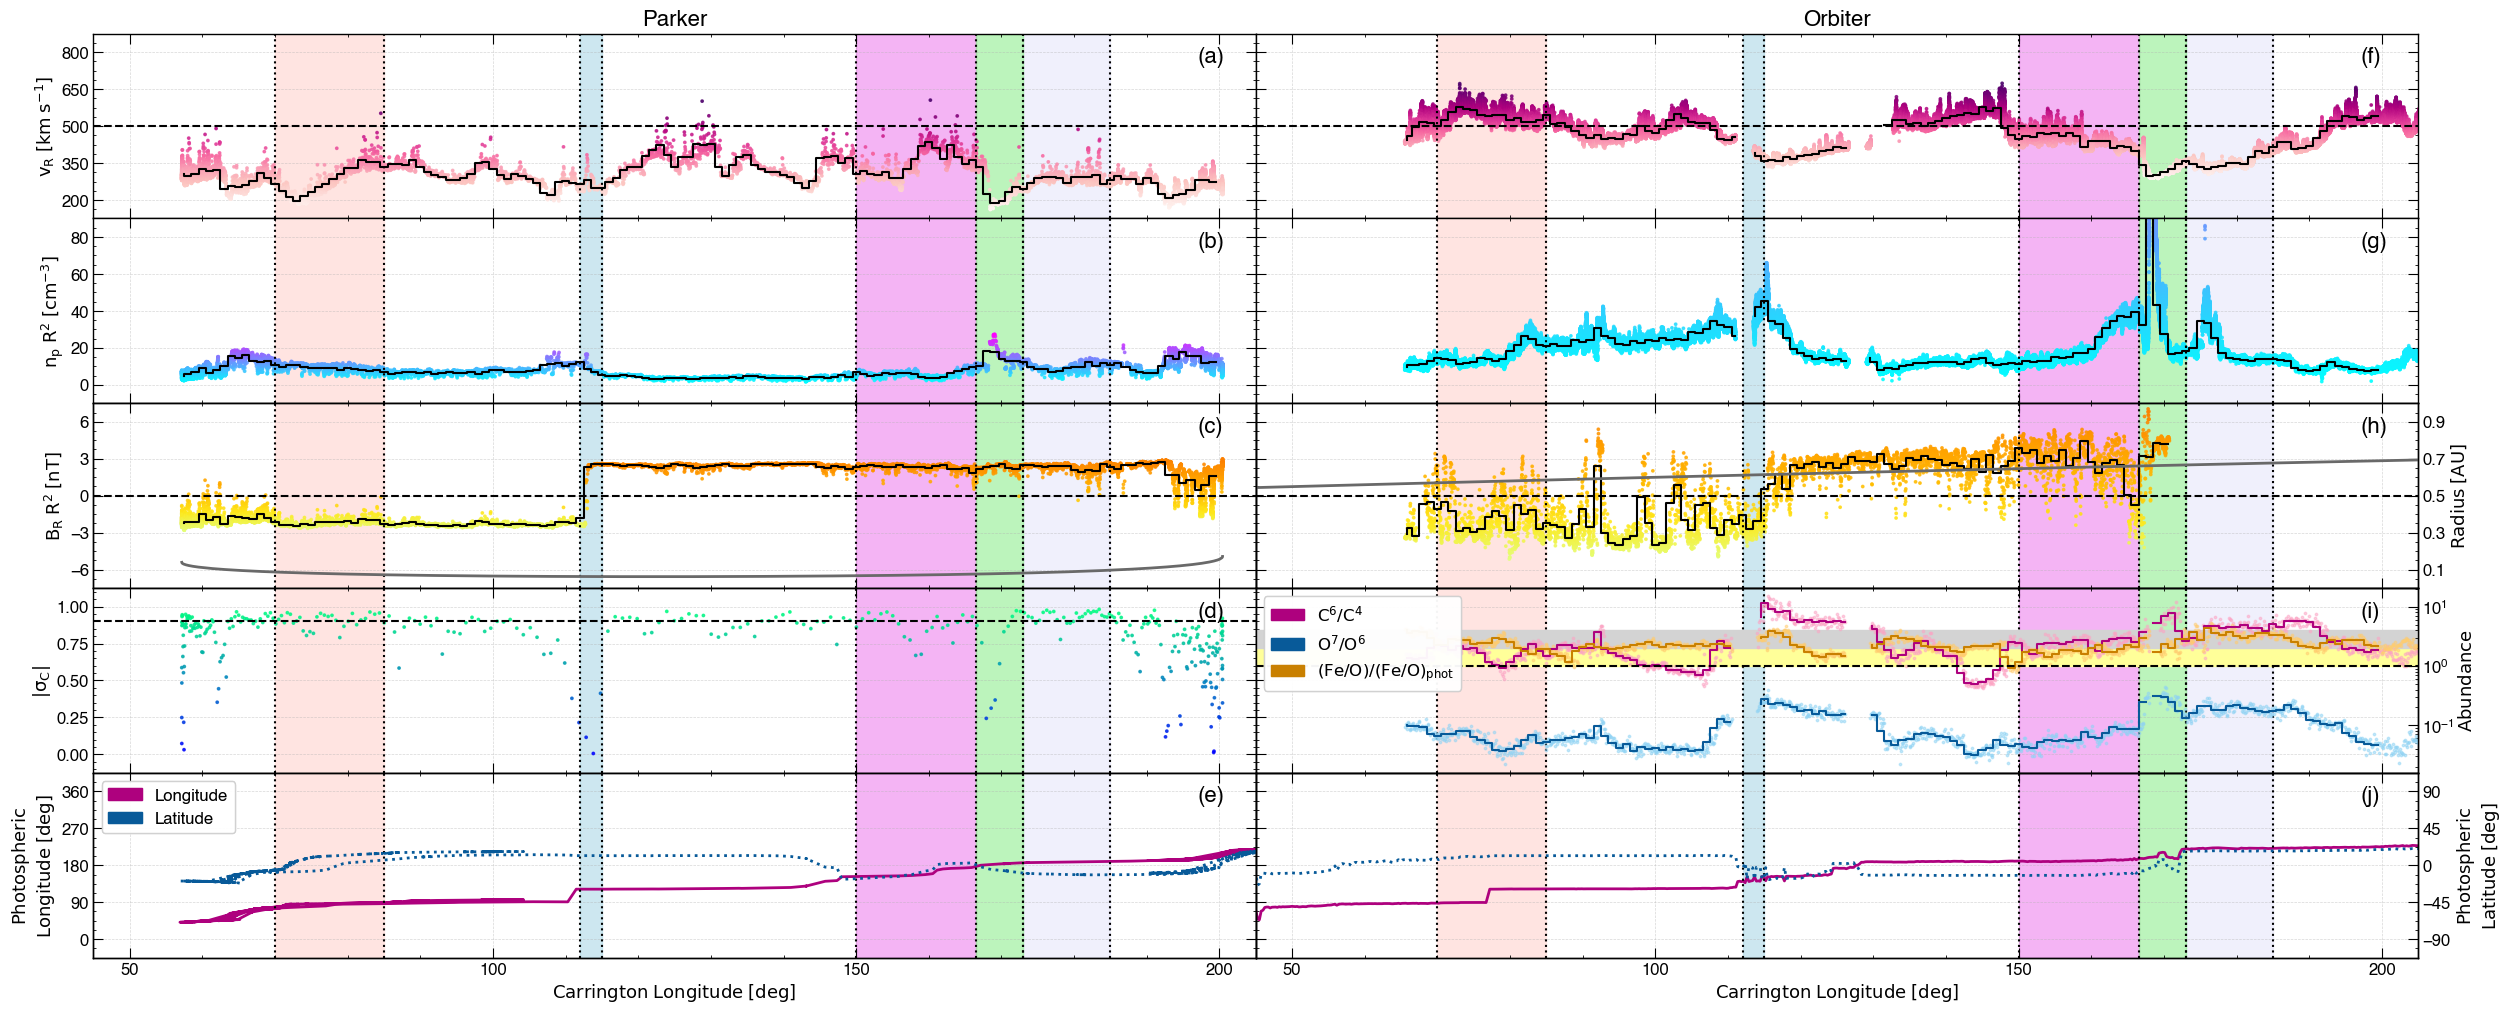

In [13]:
# PLOT STYLING
plot_style = os.path.join(PlotDir, 'figure_series.mplstyle')
plt.rcParams['mathtext.fontset'] = 'custom'
plt.rcParams['mathtext.cal'] = 'Helvetica Neue LT Pro'
plt.rcParams.update({'font.size': 16})
plt.style.use(plot_style)

# REGIONS
loc_hcs = [112, 115]
pseud = [166.5, 173]
fsw = [70, 85]
ssw = [150, 166.5]
sasw = [173, 185]

# SETUP
na=5
fig, axs = plt.subplots( na, 2, figsize=[30, 12], gridspec_kw={'hspace': 0, 'wspace': 0}, sharex='col', sharey='row')
xlabel = r'$\rm Carrington \; Longitude \; [deg]$'
ylabels = [r'$\rm v_R \; [km \; s^{-1}]$', 
r'$\rm n_p \; R^2 \; [cm^{-3}]$', 
r'$\rm B_R \; R^2 \;  [nT]$', 
r'$\rm |\sigma_C|$',
r'$\rm Abundance$',
r'$\rm Photospheric$' + '\n' r'$\rm Longitude \; [deg]$',
r'$\rm Photospheric$' + '\n' r'$\rm Latitude \; [deg]$', 
r'$\rm Radius \; [AU]$']
cmaps = ['RdPu', 'cool', 'Wistia', 'winter', 'spring']


##### ---------- PARKER DATA  ---------- ######
i=0
axs[0][0].scatter(parker.lon, parker.vr, c=parker.vr, cmap=cmaps[0], s=3, alpha=0.8)
axs[1][0].scatter(parker.lon, parker.pdens, c=parker.pdens, cmap=cmaps[1], s=3, alpha=0.8)
axs[2][0].scatter(parker.lon, parker.mag, c=parker.mag, cmap=cmaps[2], s=3, alpha=0.8)
axs[3][0].scatter(pss.lon, np.abs(pss.sigmac), c=np.abs(pss.sigmac), cmap=cmaps[3], s=3, alpha=0.8)
axs[4][0].plot(pfss.sslon, pfss.flon, color=clon, zorder=1,  linewidth=lw)
axlat1 = axs[4][0].twinx()
axlat1.plot(pfss.sslon, pfss.flat, color=clat, zorder=0, linewidth=lw, linestyle='dotted')

### plot parker time step data ###
axs[0][0].step(parkerdownl.lon, parkerdownl.vr, c='k')
axs[1][0].step(parkerdownl.lon, parkerdownl.pdens, c='k')
axs[2][0].step(parkerdownl.lon, parkerdownl.mag, c='k')

### plot radius data
axrad  = axs[2][i].twinx() 
axrad.plot(parker.lon, parker.radius, c=rcol, linewidth=lw, zorder=1)
axrad.set(ylim=(0, 1), yticks=np.arange(0.1, 0.91, step=0.2), yticklabels=([]))

### add legends
lon_patch = mpatches.Patch(color=clon, label='Longitude')
lat_patch = mpatches.Patch(color=clat, label='Latitude')
leg5 = axs[4][i].legend(handles=[lon_patch, lat_patch], loc='upper left')
axs[4][i].add_artist(leg5)

### add axes labels and tick marks
axs[0][i].set(ylabel=ylabels[0], ylim=(125, 875), yticks=np.arange(200, 801, step=150))
axs[1][i].set(ylabel=ylabels[1], ylim=(-10, 90), yticks=np.arange(0, 81, step=20))
axs[2][i].set(ylabel=ylabels[2], ylim=(-7.5, 7.5), yticks=np.arange(-6, 6.1, step=3))
axs[3][i].set(ylabel=ylabels[3], ylim=(-0.125, 1.125), yticks=np.arange(0, 1.1, step=.25))
axs[4][i].set(xlabel=xlabel, ylabel=ylabels[5], ylim=(-45, 405), yticks=np.arange(0, 361, step=90), yticklabels=np.arange(0, 361, step=90))
axs[4][0].tick_params(axis='y', which='both', direction='in', left=True)
axlat1.set(ylim=(-112.5, 112.5), yticks=np.arange(-90, 91, step=45), yticklabels=([]))

### add marks
axs[0][i].axhline(500, color='k', linestyle='dashed')
axs[2][i].axhline(0, color='k', linestyle='dashed')
axs[3][i].axhline(0.9, color='k', linestyle='dashed')
panel_labels = ['(a)', '(b)', '(c)', '(d)', '(e)']

for j in np.arange(0, na, step=1):
    # add grid
    axs[j][i].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    # plot hcs 
    axs[j][i].axvline(loc_hcs[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(loc_hcs[1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(pseud[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(pseud[1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(fsw[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(fsw[1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(sasw[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(sasw[1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(ssw[0], color='k', linestyle='dotted', zorder=5)

    # shade interesting regions
    axs[j][i].axvspan(fsw[0], fsw[1], alpha=1, color=fcol, zorder=-3)
    axs[j][i].axvspan(ssw[0], ssw[1], alpha=.6, color=scol, zorder=-3)
    axs[j][i].axvspan(sasw[0], sasw[1], alpha=.6, color=sacol, zorder=-3)
    axs[j][i].axvspan(loc_hcs[0], loc_hcs[1], alpha=.6, color=hcol, zorder=-3)
    axs[j][i].axvspan(pseud[0], pseud[1], alpha=.6, color=pcol, zorder=-3)
    
    # plot axes labels
    axs[j][i].set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
    axs[j][i].text(0.95, 0.93, panel_labels[j], transform=axs[j][i].transAxes, fontsize=16, fontweight='bold', va='top', ha='left')


##### ---------- ORBITER DATA  ---------- ######
i = 1
im0 = axs[0][i].scatter(orbiter.lon, orbiter.vr, c=orbiter.vr, cmap=cmaps[0], s=3, alpha=0.8)
im1 = axs[1][i].scatter(orbiter.lon, orbiter.use_dens, c=orbiter.use_dens, cmap=cmaps[1], s=3, alpha=0.8)
im2 = axs[2][i].scatter(smag.lon, smag.BrR2, c=smag.BrR2, cmap=cmaps[2], s=3, alpha=0.8)
axright = axs[3][i].twinx()
axright.set_yscale('log')
axright.scatter(abun.lon, abun.car, color=lightc[0], s=3, alpha=0.5)
axright.scatter(abun.lon, abun.oxy, color=lightc[1], s=3, alpha=0.5)
axright.scatter(abun.lon, abun.iron/0.0589, color=lightc[2], s=3, alpha=0.5)
axs[4][i].plot(so_pfss.lon, so_pfss.flon, color=clon, zorder=1, linewidth=lw)
axlat = axs[4][i].twinx()
axlat.plot(so_pfss.lon, so_pfss.flat, color=clat, zorder=0, linewidth=lw, linestyle='dotted')

### plot radius data
axrad  = axs[2][i].twinx() 
axrad.plot(so_pfss.lon, so_pfss.rAU, c=rcol, linewidth=lw, zorder=1)
axrad.set(ylabel=ylabels[7], ylim=(0, 1), yticks=np.arange(0.1, 0.91, step=0.2))

### plot parker time step data ###
axs[0][i].step(orbiterdownl.lon, orbiterdownl.vr, c='k')
axs[1][i].step(orbiterdownl.lon, orbiterdownl.use_dens, c='k')
axs[2][i].step(smagdownl.lon, smagdownl.BrR2, c='k')
axright.step(abundownl.lon, abundownl.car, color=c[0])
axright.step(abundownl.lon, abundownl.oxy, color=c[1])
axright.step(abundownl.lon, abundownl.iron/0.0589, color=c[2])

### add legends
C_patch = mpatches.Patch(color=c[0], label= r'$\rm C^6/C^4$')
O_patch = mpatches.Patch(color=c[1],  label=r'$\rm O^7/O^6$')
Fe_patch = mpatches.Patch(color=c[2],  label=r'$\rm (Fe/O)/(Fe/O)_{phot}$')
leg0 = axright.legend(handles=[C_patch, O_patch, Fe_patch], loc='upper left')
axright.add_artist(leg0)

### add axes labels and tick marks
axs[0][i].set(ylim=(125, 875), yticks=np.arange(200, 801, step=150))
axs[1][i].set(ylim=(-10, 90), yticks=np.arange(0, 81, step=20))
axs[2][i].set(ylim=(-7.5, 7.5), yticks=np.arange(-6, 6.1, step=3))
axright.set(ylabel=ylabels[4])
axs[4][i].set(xlabel=xlabel, ylim=(-45, 405), yticks=np.arange(0, 361, step=90))
axlat.set(ylabel=ylabels[6], ylim=(-112.5, 112.5), yticks=np.arange(-90, 91, step=45))

axs[0][i].axhline(500, color='k', linestyle='dashed')
axs[2][i].axhline(0, color='k', linestyle='dashed')
axright.axhline(1, color='k', linestyle='dashed')
axright.axhspan(1, 2, alpha=1, color='#FFFF99', zorder=-4)
axright.axhspan(2, 4, alpha=1, color='#D3D3D3', zorder=-4)
panel_labels = ['(f)', '(g)', '(h)', '(i)', '(j)']

for j in np.arange(0, na, step=1):
    # add grid
    axs[j][i].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)
    # plot hcs 
    axs[j][i].axvline(loc_hcs[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(loc_hcs[1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(pseud[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(pseud[1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(fsw[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(fsw[1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(sasw[0], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(sasw[1], color='k', linestyle='dotted', zorder=5)
    axs[j][i].axvline(ssw[0], color='k', linestyle='dotted', zorder=5)
    # shade interesting regions
    axs[j][i].axvspan(fsw[0], fsw[1], alpha=1, color=fcol, zorder=-3)
    axs[j][i].axvspan(ssw[0], ssw[1], alpha=.6, color=scol, zorder=-3)
    axs[j][i].axvspan(sasw[0], sasw[1], alpha=.6, color=sacol, zorder=-3)
    axs[j][i].axvspan(loc_hcs[0], loc_hcs[1], alpha=.6, color=hcol, zorder=-3)
    axs[j][i].axvspan(pseud[0], pseud[1], alpha=.6, color=pcol, zorder=-3)

    # plot axes labels
    axs[j][i].set(xlim=(45, 205), xticks=np.arange(50, 205, step=50))
    axs[j][i].text(0.95, 0.93, panel_labels[j], transform=axs[j][i].transAxes, fontsize=16, fontweight='bold', va='top', ha='left')

axs[0][0].set_title('Parker')
axs[0][1].set_title('Orbiter')
### save figure
plt.savefig(os.path.realpath('figures/data_2panel.png'), bbox_inches='tight')